In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt

import mxnet as mx
from mxnet import test_utils
from mxnet import ndarray as nd

from util import *
from model import *
from train import *

In [2]:
epochs = 20
batch_size = 128
label_size = 10
latent_z_size = 100
img_wd = 28
img_ht = 28

use_gpu = False
ctx = mx.gpu() if use_gpu else mx.cpu()

lr = 1e-3

In [3]:
mnist_data = test_utils.get_mnist()
train_data = mnist_data['train_data'].reshape((-1,1,img_wd,img_ht))
train_label = nd.one_hot(nd.array(mnist_data['train_label']), 10)
train_iter = mx.io.NDArrayIter(data=train_data, label=train_label, batch_size=batch_size)

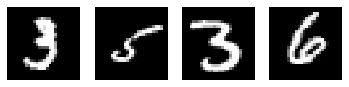

In [5]:
for i in range(4):
    plt.subplot(1,4,i+1)
    visualize(nd.array(train_data[i + 10]))
plt.show()

## Experiment 1

### Architecture:
1. 4 Layers Convolutions (Transpose) for Generator
2. 5 Layers Convolutions + 3 Dense Layers for Discriminator
3. Adam Optimiser
4. Filter Size for Generator: [4x4]
5. Filter Size for Discriminator: [3x3]

### Default Parameters for all Experimentation
1. Learning rate = 1e-3; Epochs = 20

Epoch: 1 ; Current batch: 469 / 469
Binary training accuracy at epoch 1: facc=0.992246
Discriminator Loss: 0.010; Generator Loss: 11.496
time: 154.0 sec


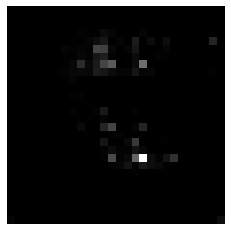

Epoch: 2 ; Current batch: 469 / 469
Binary training accuracy at epoch 2: facc=0.987573
Discriminator Loss: 0.020; Generator Loss: 11.951
time: 148.0 sec
Epoch: 3 ; Current batch: 469 / 469
Binary training accuracy at epoch 3: facc=0.987598
Discriminator Loss: 0.386; Generator Loss: 9.730
time: 160.0 sec
Epoch: 4 ; Current batch: 469 / 469
Binary training accuracy at epoch 4: facc=0.978370
Discriminator Loss: 0.115; Generator Loss: 5.580
time: 157.0 sec
Epoch: 5 ; Current batch: 469 / 469
Binary training accuracy at epoch 5: facc=0.961112
Discriminator Loss: 0.873; Generator Loss: 11.923
time: 159.0 sec
Epoch: 6 ; Current batch: 469 / 469
Binary training accuracy at epoch 6: facc=0.952200
Discriminator Loss: 0.088; Generator Loss: 7.163
time: 161.0 sec


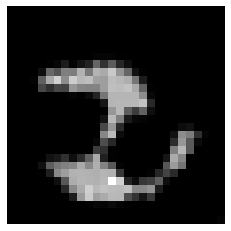

Epoch: 7 ; Current batch: 469 / 469
Binary training accuracy at epoch 7: facc=0.946645
Discriminator Loss: 0.046; Generator Loss: 6.304
time: 143.0 sec
Epoch: 8 ; Current batch: 469 / 469
Binary training accuracy at epoch 8: facc=0.932952
Discriminator Loss: 0.461; Generator Loss: 6.563
time: 144.0 sec
Epoch: 9 ; Current batch: 469 / 469
Binary training accuracy at epoch 9: facc=0.930554
Discriminator Loss: 0.305; Generator Loss: 5.019
time: 145.0 sec
Epoch: 10 ; Current batch: 469 / 469
Binary training accuracy at epoch 10: facc=0.920159
Discriminator Loss: 0.236; Generator Loss: 5.726
time: 145.0 sec
Epoch: 11 ; Current batch: 469 / 469
Binary training accuracy at epoch 11: facc=0.903585
Discriminator Loss: 0.675; Generator Loss: 2.551
time: 142.0 sec


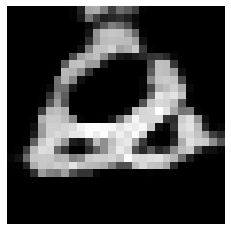

Epoch: 12 ; Current batch: 469 / 469
Binary training accuracy at epoch 12: facc=0.886086
Discriminator Loss: 0.365; Generator Loss: 5.857
time: 144.0 sec
Epoch: 13 ; Current batch: 469 / 469
Binary training accuracy at epoch 13: facc=0.843334
Discriminator Loss: 0.814; Generator Loss: 1.868
time: 145.0 sec
Epoch: 14 ; Current batch: 469 / 469
Binary training accuracy at epoch 14: facc=0.829674
Discriminator Loss: 0.566; Generator Loss: 3.000
time: 150.0 sec
Epoch: 15 ; Current batch: 469 / 469
Binary training accuracy at epoch 15: facc=0.797391
Discriminator Loss: 0.627; Generator Loss: 3.229
time: 152.0 sec
Epoch: 16 ; Current batch: 469 / 469
Binary training accuracy at epoch 16: facc=0.781941
Discriminator Loss: 0.666; Generator Loss: 1.848
time: 152.0 sec


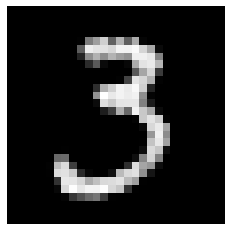

Epoch: 17 ; Current batch: 469 / 469
Binary training accuracy at epoch 17: facc=0.781708
Discriminator Loss: 0.845; Generator Loss: 2.222
time: 148.0 sec
Epoch: 18 ; Current batch: 469 / 469
Binary training accuracy at epoch 18: facc=0.808211
Discriminator Loss: 0.608; Generator Loss: 1.759
time: 152.0 sec
Epoch: 19 ; Current batch: 469 / 469
Binary training accuracy at epoch 19: facc=0.752365
Discriminator Loss: 1.730; Generator Loss: 0.870
time: 154.0 sec
Epoch: 20 ; Current batch: 469 / 469
Binary training accuracy at epoch 20: facc=0.753898
Discriminator Loss: 0.961; Generator Loss: 1.227
time: 153.0 sec


In [6]:
model = CGAN1()
net = get_networks(model)

trainer = Trainer(train_iter, net, batch_size, latent_z_size)
trainer.fit(epochs=epochs, lr=lr)

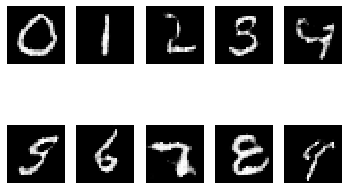

In [7]:
trainer.generate_samples(1)

## Experiment 2 - Optimiser

### Architecture:
1. 4 Layers Convolutions (Transpose) for Generator
2. 5 Layers Convolutions + 3 Dense Layers for Discriminator
3. **RMSProp Optimiser**
4. Filter Size for Generator: [4x4]
5. Filter Size for Discriminator: [3x3]

### Default Parameters for all Experimentation
1. Learning rate = 1e-3; Epochs = 20

Epoch: 1 ; Current batch: 469 / 469
Binary training accuracy at epoch 1: facc=0.840552
Discriminator Loss: 0.702; Generator Loss: 1.447
time: 156.0 sec


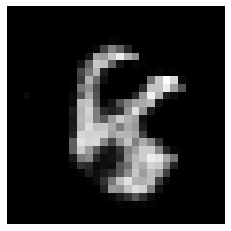

Epoch: 2 ; Current batch: 469 / 469
Binary training accuracy at epoch 2: facc=0.816623
Discriminator Loss: 0.719; Generator Loss: 2.548
time: 156.0 sec
Epoch: 3 ; Current batch: 469 / 469
Binary training accuracy at epoch 3: facc=0.753690
Discriminator Loss: 1.186; Generator Loss: 1.936
time: 160.0 sec
Epoch: 4 ; Current batch: 469 / 469
Binary training accuracy at epoch 4: facc=0.705041
Discriminator Loss: 1.113; Generator Loss: 1.578
time: 164.0 sec
Epoch: 5 ; Current batch: 469 / 469
Binary training accuracy at epoch 5: facc=0.699119
Discriminator Loss: 1.193; Generator Loss: 1.527
time: 165.0 sec
Epoch: 6 ; Current batch: 469 / 469
Binary training accuracy at epoch 6: facc=0.697162
Discriminator Loss: 1.130; Generator Loss: 2.004
time: 165.0 sec


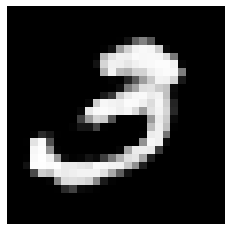

Epoch: 7 ; Current batch: 469 / 469
Binary training accuracy at epoch 7: facc=0.700435
Discriminator Loss: 1.130; Generator Loss: 1.284
time: 158.0 sec
Epoch: 8 ; Current batch: 469 / 469
Binary training accuracy at epoch 8: facc=0.696062
Discriminator Loss: 1.111; Generator Loss: 1.233
time: 166.0 sec
Epoch: 9 ; Current batch: 469 / 469
Binary training accuracy at epoch 9: facc=0.703142
Discriminator Loss: 0.966; Generator Loss: 1.300
time: 161.0 sec
Epoch: 10 ; Current batch: 469 / 469
Binary training accuracy at epoch 10: facc=0.705216
Discriminator Loss: 1.058; Generator Loss: 1.346
time: 162.0 sec
Epoch: 11 ; Current batch: 469 / 469
Binary training accuracy at epoch 11: facc=0.709222
Discriminator Loss: 1.174; Generator Loss: 1.401
time: 156.0 sec


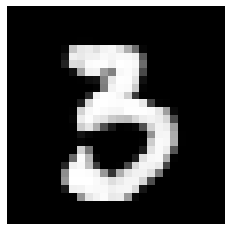

Epoch: 12 ; Current batch: 469 / 469
Binary training accuracy at epoch 12: facc=0.705099
Discriminator Loss: 1.260; Generator Loss: 2.032
time: 151.0 sec
Epoch: 13 ; Current batch: 469 / 469
Binary training accuracy at epoch 13: facc=0.707498
Discriminator Loss: 0.985; Generator Loss: 1.116
time: 154.0 sec
Epoch: 14 ; Current batch: 469 / 469
Binary training accuracy at epoch 14: facc=0.709905
Discriminator Loss: 1.143; Generator Loss: 1.876
time: 165.0 sec
Epoch: 15 ; Current batch: 469 / 469
Binary training accuracy at epoch 15: facc=0.713511
Discriminator Loss: 0.792; Generator Loss: 2.050
time: 158.0 sec
Epoch: 16 ; Current batch: 469 / 469
Binary training accuracy at epoch 16: facc=0.719350
Discriminator Loss: 0.721; Generator Loss: 2.115
time: 164.0 sec


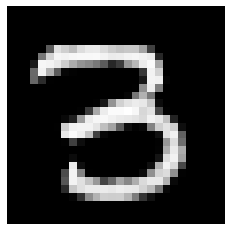

Epoch: 17 ; Current batch: 469 / 469
Binary training accuracy at epoch 17: facc=0.722206
Discriminator Loss: 0.827; Generator Loss: 1.405
time: 161.0 sec
Epoch: 18 ; Current batch: 469 / 469
Binary training accuracy at epoch 18: facc=0.727395
Discriminator Loss: 0.576; Generator Loss: 1.705
time: 163.0 sec
Epoch: 19 ; Current batch: 469 / 469
Binary training accuracy at epoch 19: facc=0.728103
Discriminator Loss: 0.531; Generator Loss: 1.791
time: 162.0 sec
Epoch: 20 ; Current batch: 469 / 469
Binary training accuracy at epoch 20: facc=0.730935
Discriminator Loss: 0.790; Generator Loss: 1.465
time: 164.0 sec


In [8]:
model = CGAN1()
net = get_networks(model)

trainer = Trainer(train_iter, net, batch_size, latent_z_size)
trainer.fit(epochs=epochs, lr=lr, optim="rmsprop")

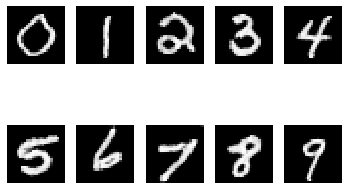

In [9]:
trainer.generate_samples(1)

## Experiment 3 - Filters & Convolutions

### Architecture:
1. **6 Layers Convolutions (Transpose) for Generator**
2. **6 Layers Convolutions + 3 Dense Layers for Discriminator**
3. Adam Optimiser
4. **Filter Size for Generator: [3x3]**
5. **Filter Size for Discriminator: [4x4]**

### Default Parameters for all Experimentation
1. Learning rate = 1e-3; Epochs = 20

Epoch: 1 ; Current batch: 469 / 469
Binary training accuracy at epoch 1: facc=0.981593
Discriminator Loss: 0.000; Generator Loss: 12.595
time: 347.0 sec


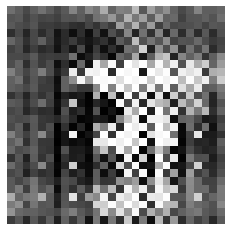

Epoch: 2 ; Current batch: 469 / 469
Binary training accuracy at epoch 2: facc=0.990239
Discriminator Loss: 0.025; Generator Loss: 4.663
time: 360.0 sec
Epoch: 3 ; Current batch: 469 / 469
Binary training accuracy at epoch 3: facc=0.992404
Discriminator Loss: 0.029; Generator Loss: 4.185
time: 359.0 sec
Epoch: 4 ; Current batch: 469 / 469
Binary training accuracy at epoch 4: facc=0.987973
Discriminator Loss: 0.042; Generator Loss: 4.543
time: 359.0 sec
Epoch: 5 ; Current batch: 469 / 469
Binary training accuracy at epoch 5: facc=0.993645
Discriminator Loss: 0.003; Generator Loss: 6.249
time: 361.0 sec
Epoch: 6 ; Current batch: 469 / 469
Binary training accuracy at epoch 6: facc=0.985933
Discriminator Loss: 0.030; Generator Loss: 5.023
time: 356.0 sec


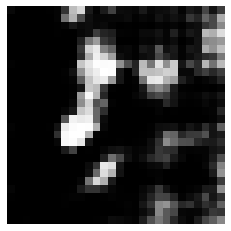

Epoch: 7 ; Current batch: 469 / 469
Binary training accuracy at epoch 7: facc=0.983567
Discriminator Loss: 0.069; Generator Loss: 5.382
time: 357.0 sec
Epoch: 8 ; Current batch: 469 / 469
Binary training accuracy at epoch 8: facc=0.989872
Discriminator Loss: 2.130; Generator Loss: 20.226
time: 365.0 sec
Epoch: 9 ; Current batch: 469 / 469
Binary training accuracy at epoch 9: facc=0.981951
Discriminator Loss: 0.200; Generator Loss: 7.610
time: 369.0 sec
Epoch: 10 ; Current batch: 469 / 469
Binary training accuracy at epoch 10: facc=0.991654
Discriminator Loss: 0.029; Generator Loss: 6.741
time: 371.0 sec
Epoch: 11 ; Current batch: 469 / 469
Binary training accuracy at epoch 11: facc=0.989422
Discriminator Loss: 0.056; Generator Loss: 5.180
time: 366.0 sec


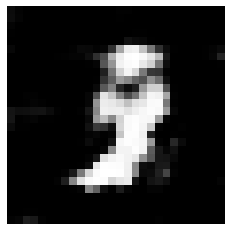

Epoch: 12 ; Current batch: 469 / 469
Binary training accuracy at epoch 12: facc=0.986532
Discriminator Loss: 0.095; Generator Loss: 4.231
time: 362.0 sec
Epoch: 13 ; Current batch: 469 / 469
Binary training accuracy at epoch 13: facc=0.994811
Discriminator Loss: 0.082; Generator Loss: 13.180
time: 348.0 sec
Epoch: 14 ; Current batch: 469 / 469
Binary training accuracy at epoch 14: facc=0.992071
Discriminator Loss: 0.074; Generator Loss: 6.135
time: 353.0 sec
Epoch: 15 ; Current batch: 469 / 469
Binary training accuracy at epoch 15: facc=0.982543
Discriminator Loss: 0.028; Generator Loss: 4.751
time: 331.0 sec
Epoch: 16 ; Current batch: 469 / 469
Binary training accuracy at epoch 16: facc=0.983009
Discriminator Loss: 0.168; Generator Loss: 3.898
time: 340.0 sec


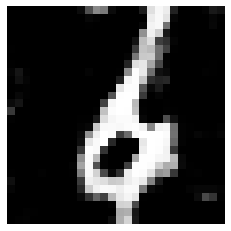

Epoch: 17 ; Current batch: 469 / 469
Binary training accuracy at epoch 17: facc=0.981693
Discriminator Loss: 0.126; Generator Loss: 4.049
time: 333.0 sec
Epoch: 18 ; Current batch: 469 / 469
Binary training accuracy at epoch 18: facc=0.987198
Discriminator Loss: 0.129; Generator Loss: 4.496
time: 344.0 sec
Epoch: 19 ; Current batch: 469 / 469
Binary training accuracy at epoch 19: facc=0.986682
Discriminator Loss: 0.071; Generator Loss: 3.656
time: 336.0 sec
Epoch: 20 ; Current batch: 469 / 469
Binary training accuracy at epoch 20: facc=0.988606
Discriminator Loss: 0.069; Generator Loss: 5.957
time: 345.0 sec


In [10]:
model = CGAN2()
net = get_networks(model)

trainer = Trainer(train_iter, net, batch_size, latent_z_size)
trainer.fit(epochs=epochs, lr=lr)

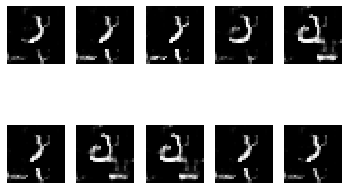

In [11]:
trainer.generate_samples(1)